<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are a data scientist hired by TelCoX, a telecommunications company struggling with high customer churn rates. Your mission is to build a logistic regression model to predict customer churn and provide actionable insights to reduce churn. You are given access to a Kaggle dataset
containing historical customer data.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,auc,cohen_kappa_score,matthews_corrcoef,classification_report, confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.impute import SimpleImputer

# Data Preprocessing

In [63]:
telecom_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
telecom_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [67]:
total_charges = telecom_data[telecom_data.TotalCharges == " "]
total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [68]:
# Replace the empty rows with zero
telecom_data.loc[telecom_data['TotalCharges']==" ",'TotalCharges'] = '0'

# Convert the total charges to numerical values
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges)

**Feature Engineering**

Encoding the categorical variables before creating logistic regression model that can predict the customer churn rates

In [69]:
X = telecom_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [70]:
y = telecom_data['Churn']

Using label encoding to convert non numerical data into integer

In [ ]:
le = LabelEncoder()

X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])
X['MonthlyCharges'] = le.fit_transform(X['MonthlyCharges'])
X['TotalCharges'] = le.fit_transform(X['TotalCharges'])
y = le.fit_transform(y)

# Logistic Regression Model

Split the dataset into training and testing

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [74]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation and Visualization

In [79]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
mcc = matthews_corrcoef(y_test,y_pred)

In [81]:
print('Accuracy score : ',accuracy)
print('Precision score : ', precision)
print('Recall score : ',recall)
print('F1 score : ', f1)
print('ROC AUC score : ',roc_auc)
print('Cohen Kappa score : ',kappa)
print('Matthews correlation coefficient score : ',mcc)

Accuracy score :  0.8063600227143668
Precision score :  0.6844919786096256
Recall score :  0.534446764091858
F1 score :  0.6002344665885112
ROC AUC score :  0.7212015411722941
Cohen Kappa score :  0.47501357269060995
Matthews correlation coefficient score :  0.48134435373310513


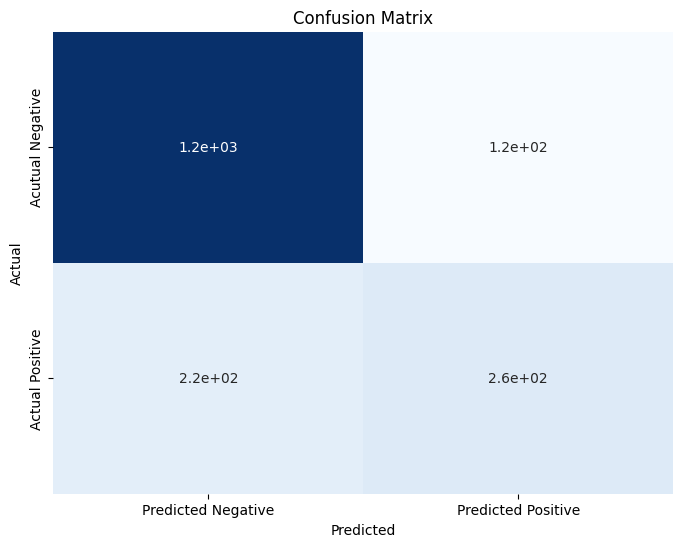

In [85]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',cbar=False,xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels = ['Acutual Negative','Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

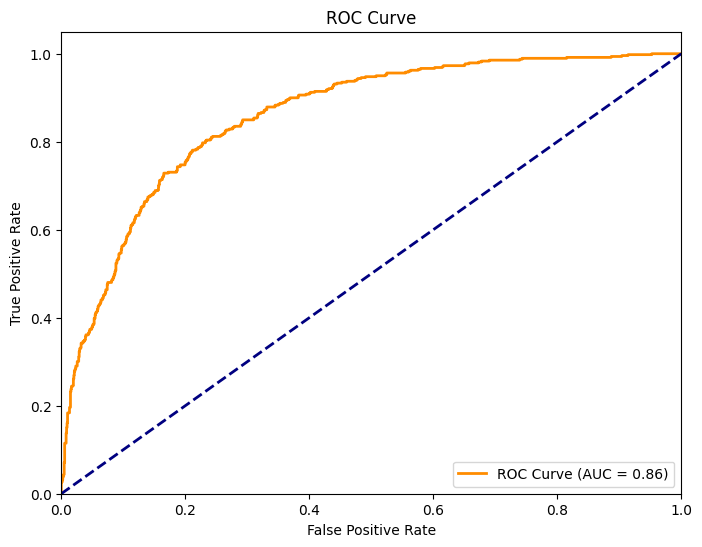

Auc :  0.8580432778897795


In [88]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Auc : ", roc_auc)

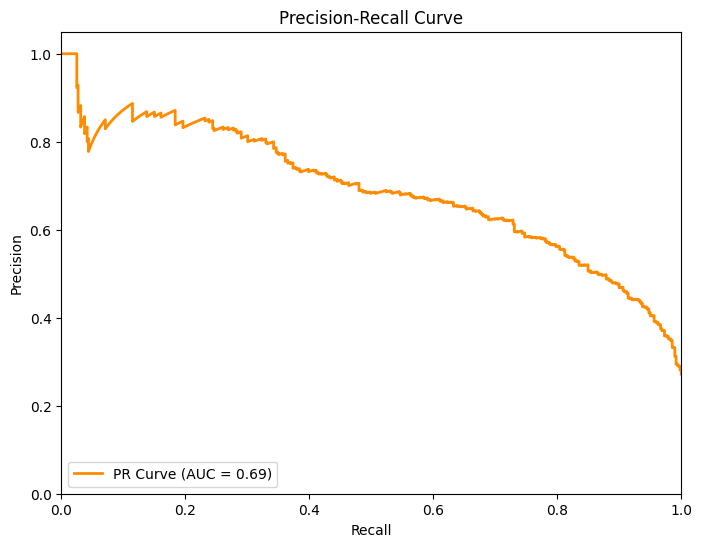

PR AUC : 0.6895026267268326


In [93]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

pr_auc = auc(recall, precision)

# Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#  AUC for the Precision-Recall curve
print(f"PR AUC :",pr_auc)

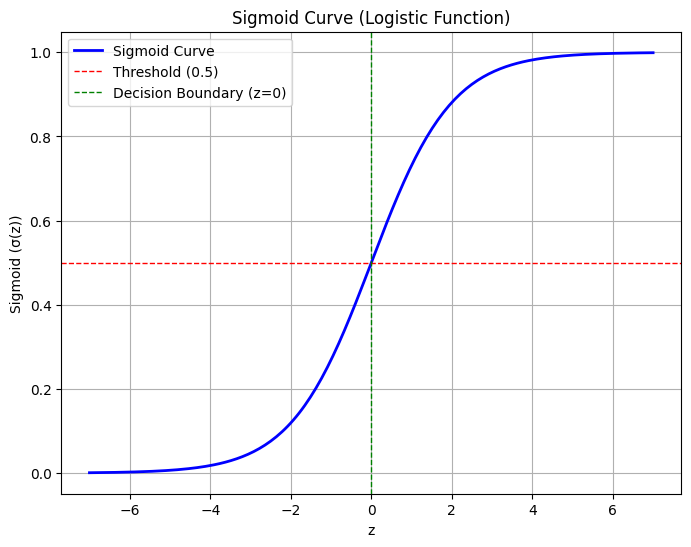

In [95]:
# sigmoid logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create a range of values for z
z = np.linspace(-7, 7, 200)

# Calculate the corresponding sigmoid values
sigmoid_values = sigmoid(z)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Curve', color='blue', lw=2)
plt.xlabel('z')
plt.ylabel('Sigmoid (σ(z))')
plt.title('Sigmoid Curve (Logistic Function)')
plt.axhline(0.5, color='red', linestyle='--', lw=1, label='Threshold (0.5)')
plt.axvline(0, color='green', linestyle='--', lw=1, label='Decision Boundary (z=0)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**Significance** : The sigmoid curve serves as a squashing function that maps any real number z to a probability between 0 and 1. This is essential for binary classification, where we want to estimate the probability of an instance belonging to a particular class.

The S shaped nature of the curve allows for a smooth and continuous transition from one class to another. This makes the logistic regression well suited for problems where the relationship between features and the target variable is non linear